In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Apr 15 09:48:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
!pip install tensorflow
!pip install keras

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [5]:
(xtrain,ytrain),(xtest,ytest)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [6]:
ytest=ytest.reshape(-1,)
ytest

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [7]:
classname=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def example(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classname[y[index]])

#x: Dataset containing the images.
#y: Dataset containing the labels. Specifies the class of each image.
#index: Specify the index of the data point to be visualized

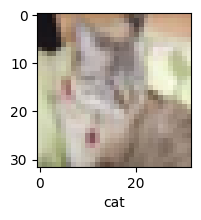

In [9]:
example(xtest,ytest,8)

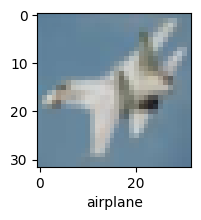

In [10]:
example(xtest,ytest,10)

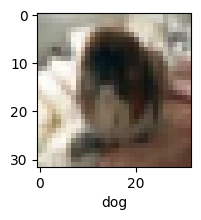

In [11]:
example(xtest,ytest,200)

## Normalization Operations


In [12]:
xtrain=xtrain/255
xtest=xtest/255

In [14]:
from keras.layers import Input

model = models.Sequential([
    Input(shape=(32,32,3)),  # InputLayer'ı buraya ekleyin
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [15]:
model

<Sequential name=sequential, built=True>

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

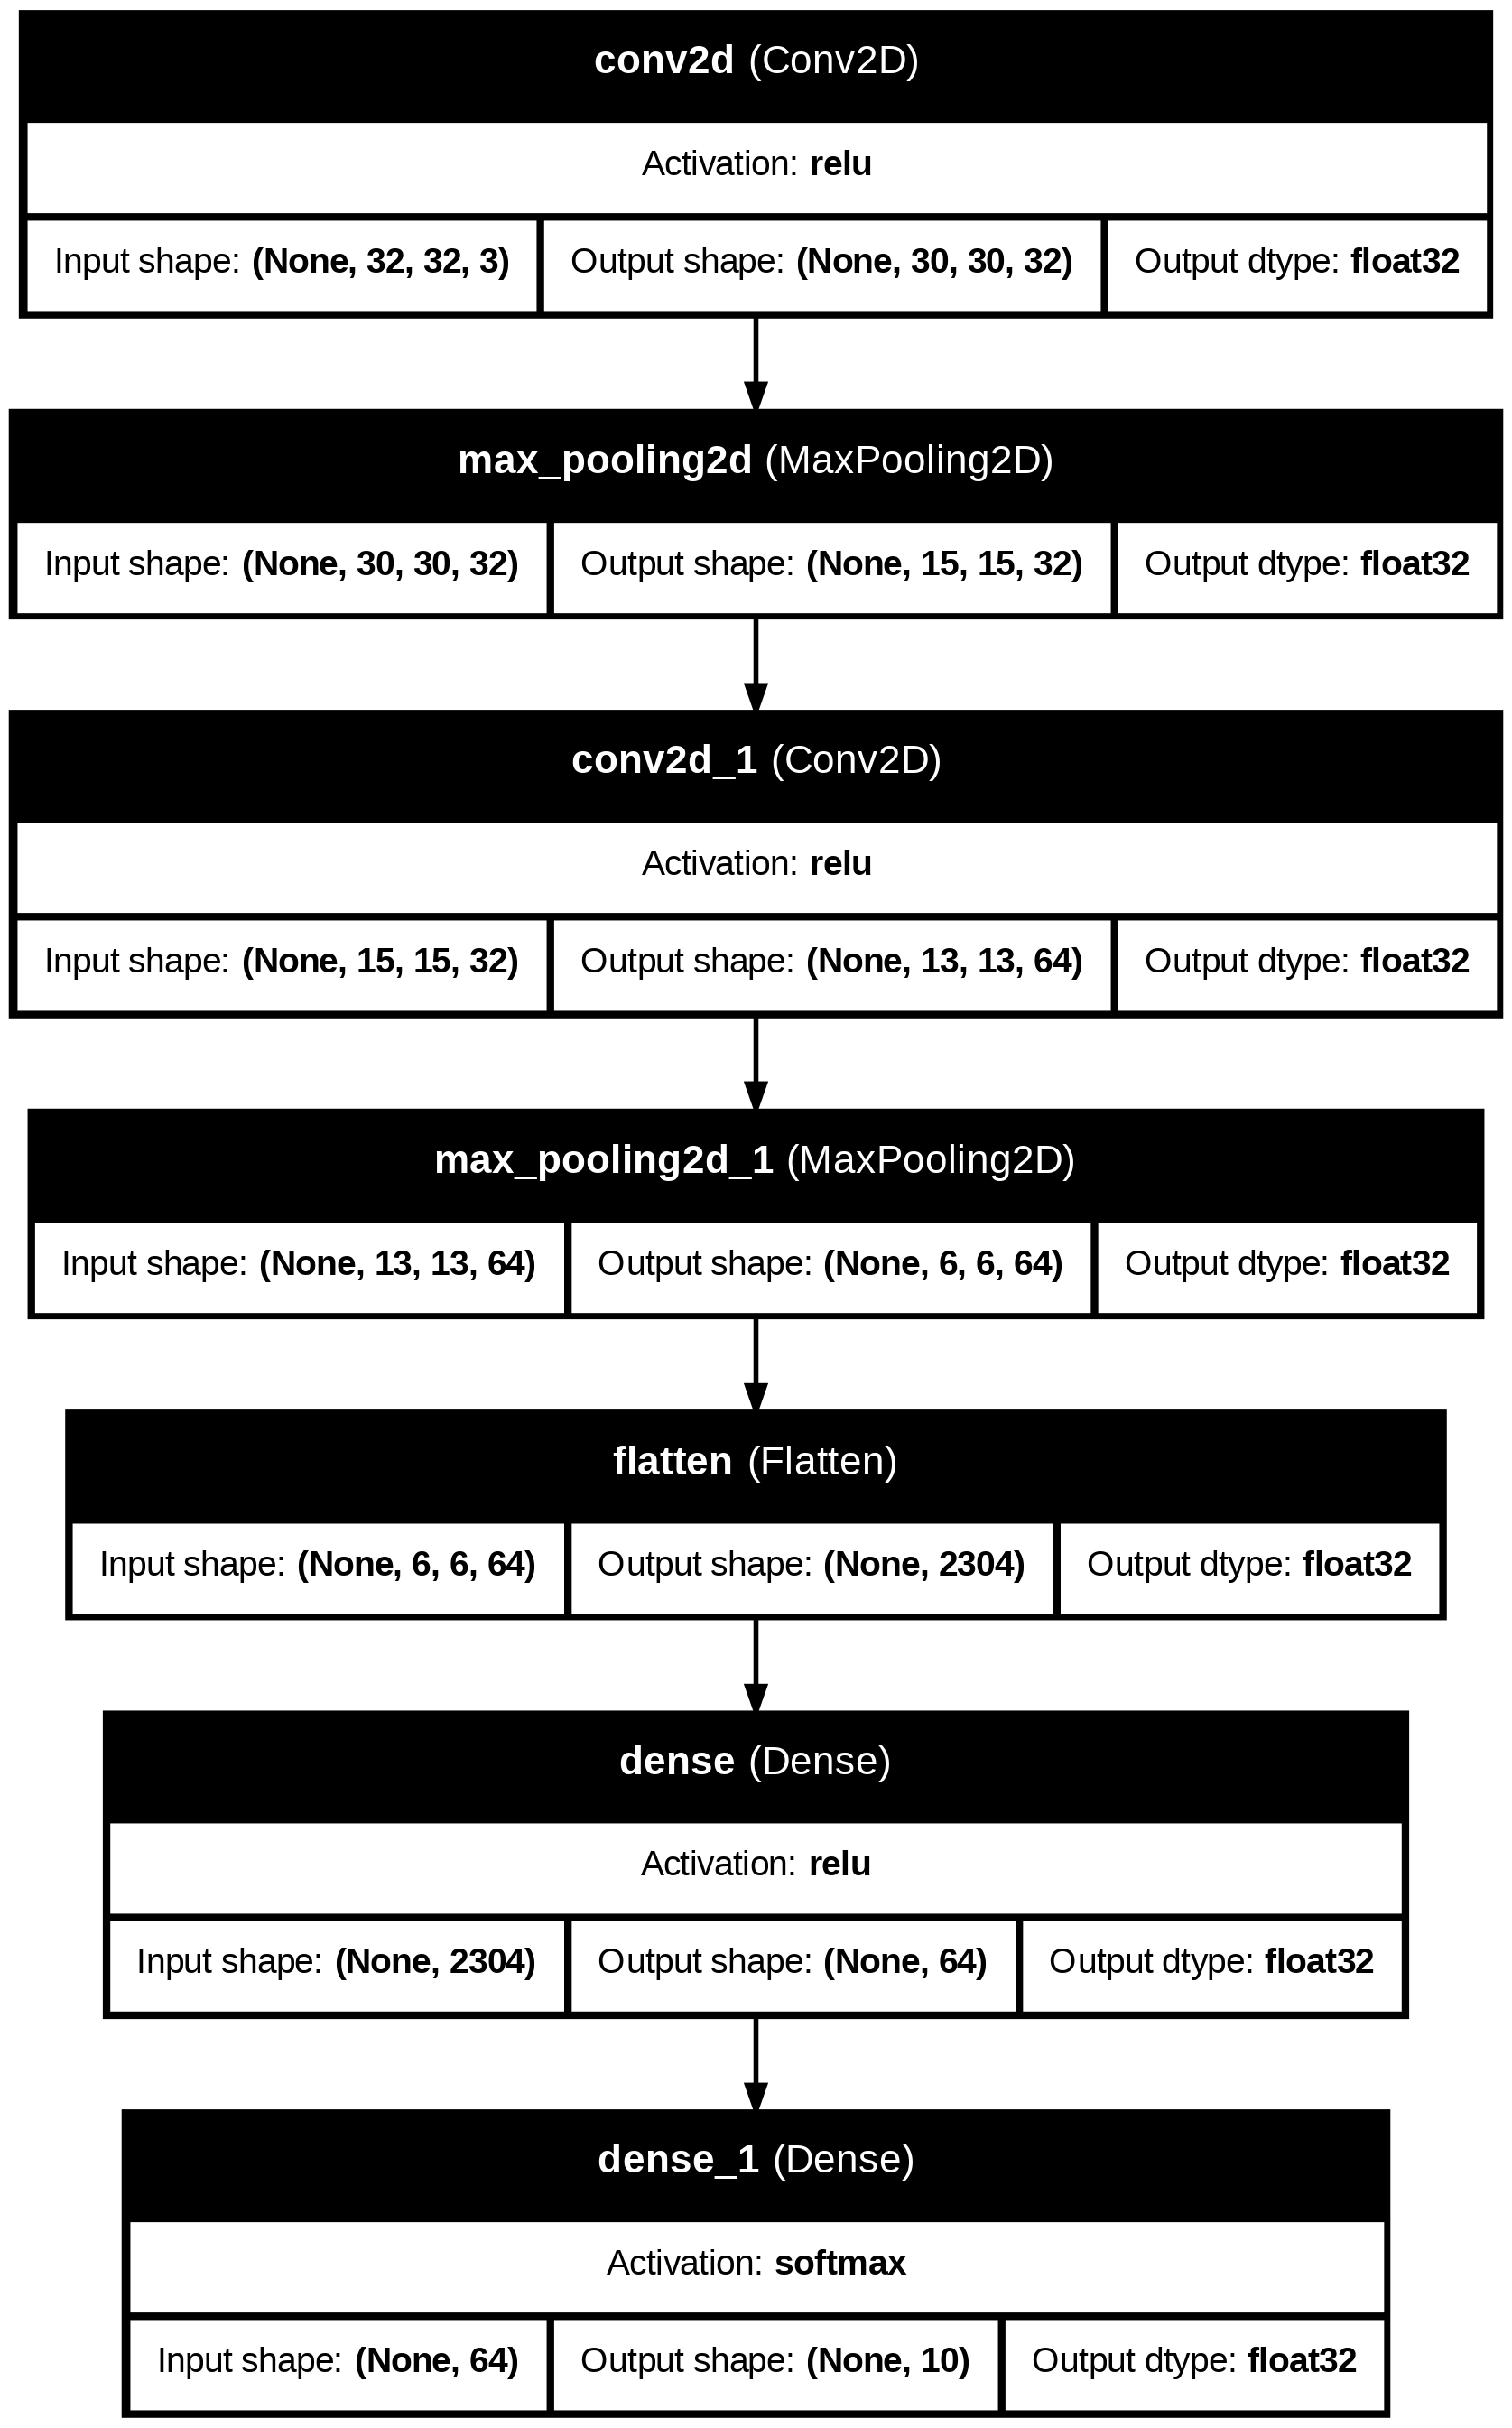

In [18]:
from tensorflow.keras.utils import plot_model
# or from keras.utils import plot_model

plot_model(
    model,
    to_file='model_plot.png',
    show_shapes=True,
    show_layer_names=True,
    show_dtype=True,            # Optionally shows layer dtypes
    expand_nested=True,         # Expands nested models if any
    show_layer_activations=True # Shows activation functions
)


In [19]:
model.save('my_model.h5')  # or model.save('my_model') for TensorFlow SavedModel format


In [20]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## Training the Model

In [21]:
history=model.fit(xtrain,ytrain,epochs=30, validation_data=(xtest,ytest))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3824 - loss: 1.6923 - val_accuracy: 0.5742 - val_loss: 1.1908
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.5978 - loss: 1.1461 - val_accuracy: 0.6223 - val_loss: 1.0856
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6508 - loss: 1.0074 - val_accuracy: 0.6660 - val_loss: 0.9723
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6832 - loss: 0.9113 - val_accuracy: 0.6561 - val_loss: 0.9859
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7099 - loss: 0.8369 - val_accuracy: 0.6775 - val_loss: 0.9453
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7307 - loss: 0.7838 - val_accuracy: 0.6888 - val_loss: 0.9198
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7422 - loss: 0.7386 - val_accuracy: 0.6888 - val_loss: 0.9350
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7631 - loss: 0.68

In [22]:
loss,acc= model.evaluate(xtest,ytest,verbose=False)

Text(0.5, 1.0, 'Training and Test Performance Graph')

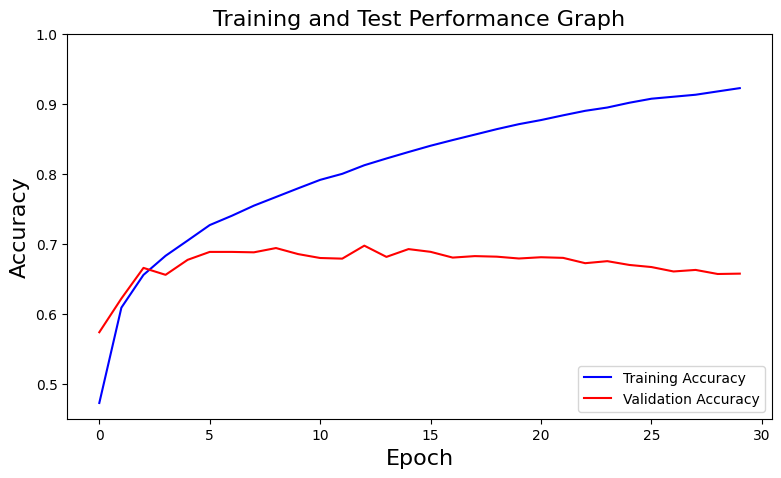

In [23]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],color = "b",label= "Training Accuracy")
plt.plot(history.history["val_accuracy"], color = "r", label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.xlabel("Epoch", fontsize= 16)
plt.ylabel("Accuracy",fontsize = 16)
plt.ylim([min(plt.ylim()),1])
plt.title("Training and Test Performance Graph", fontsize = 16)

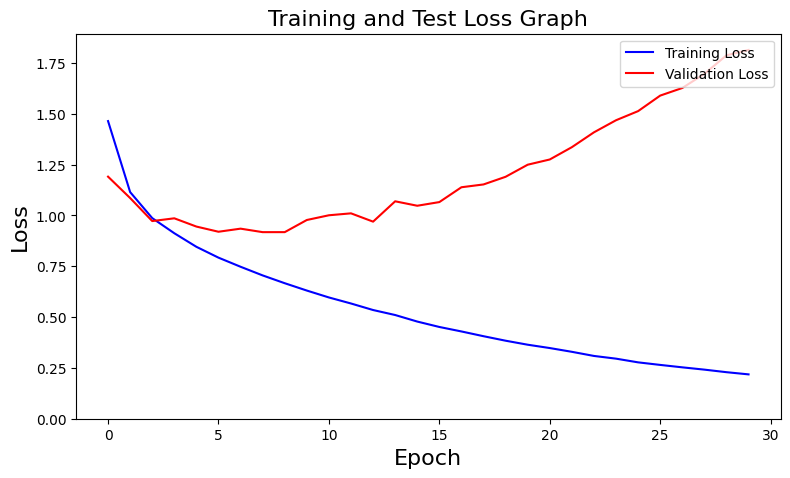

In [24]:
plt.figure(figsize= (20,5))
plt.subplot(1,2,2)
plt.plot(history.history["loss"],color= "b",label="Training Loss")
plt.plot(history.history["val_loss"],color="r",label="Validation Loss")
plt.legend(loc= "upper right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Loss",fontsize = 16)
plt.ylim([0,max(plt.ylim())])
plt.title("Training and Test Loss Graph",fontsize= 16)
plt.show()

In [25]:
ypred=model.predict(xtest)
ypred[:3]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[6.8252199e-09, 9.1806215e-17, 1.3239723e-09, 9.9385589e-01,
        5.0169416e-07, 6.1403415e-03, 3.3744093e-06, 6.1177396e-12,
        2.3952066e-12, 1.5252600e-18],
       [1.0318481e-04, 6.3733459e-02, 1.1973509e-11, 3.3035651e-11,
        2.3931115e-13, 3.6250615e-18, 6.4265458e-20, 1.4178391e-13,
        9.3609023e-01, 7.3066272e-05],
       [1.0414997e-02, 3.4550408e-01, 6.5132546e-05, 1.0314635e-03,
        9.5357692e-08, 5.3181992e-07, 1.6629171e-07, 1.6649834e-05,
        6.0697073e-01, 3.5996154e-02]], dtype=float32)

In [26]:
ypred1=[np.argmax(element) for element in ypred]
ypred1[:3]

[np.int64(3), np.int64(8), np.int64(8)]

In [27]:
# True classes
y_true = [3, 8, 8, 0]

# Predicted classes
ypred1 = [3, 8, 1, 0]

# Printing the true and predicted classes
for true, pred in zip(y_true[:3], ypred1[:3]):
    print("True Class:", classname[true], "\tPredicted Class:", classname[pred])

True Class: cat 	Predicted Class: cat
True Class: ship 	Predicted Class: ship
True Class: ship 	Predicted Class: automobile


In [32]:
from sklearn.metrics import classification_report

# Assuming y_true and ypred1 contain only labels from 0 to 9
# Extract unique labels from y_true and ypred1
unique_labels = sorted(list(set(y_true + ypred1)))

# Select corresponding target names for the unique labels
selected_target_names = [classname[label] for label in unique_labels]

# Generate the classification report using the selected target names
print(classification_report(y_true, ypred1, target_names=selected_target_names))

              precision    recall  f1-score   support

    airplane       1.00      1.00      1.00         1
  automobile       0.00      0.00      0.00         0
         cat       1.00      1.00      1.00         1
        ship       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.75      0.62      0.67         4
weighted avg       1.00      0.75      0.83         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


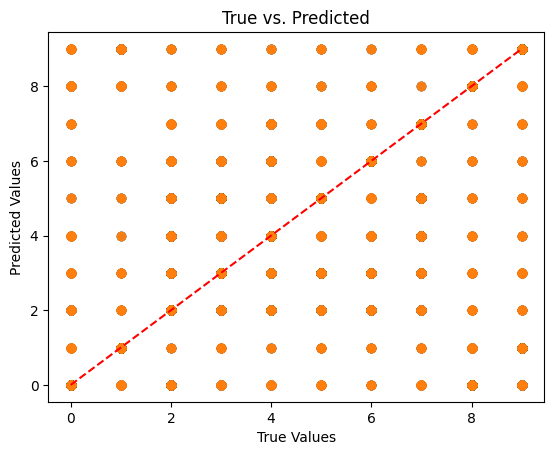

In [36]:
import matplotlib.pyplot as plt


ypred = model.predict(xtest)  # Get predictions for the test set
ypred1 = [np.argmax(element) for element in ypred]  # Get predicted class labels

# Ensure ytest and ypred1 have the same length
ypred1 = ypred1[:len(ytest)]  # Adjust ypred1 to match ytest length if necessary

# Now you can create the scatter plot
plt.scatter(ytest, ypred1, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted")

# ... (rest of your plotting code) ...
plt.scatter(ytest, ypred1, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted")
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], "r--")  # Diagonal line for reference
plt.show()
